# Lab 1 - NLP Preprocessing

The task is to preprocess tweets for sentiment analysis. For this task, I am going to use NLTK (Natural Language Toolkit) package. I am using Twitter dataset that is already there in the NLTK library.

In [108]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [109]:
import pandas as pd

In [110]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/pallavisingh/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [111]:
# Load the positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [112]:
# Create labels for the positive and negative tweets
positive_labels = [1] * len(positive_tweets)
negative_labels = [0] * len(negative_tweets)

# Combine the tweets and labels into a single list
tweets = positive_tweets + negative_tweets
labels = positive_labels + negative_labels

# Create a DataFrame
df = pd.DataFrame({'tweet': tweets, 'label': labels})

# Display the DataFrame
print(df.head())

                                               tweet  label
0  #FollowFriday @France_Inte @PKuchly57 @Milipol...      1
1  @Lamb2ja Hey James! How odd :/ Please call our...      1
2  @DespiteOfficial we had a listen last night :)...      1
3                               @97sides CONGRATS :)      1
4  yeaaaah yippppy!!!  my accnt verified rqst has...      1


In [113]:
target_distribution = df['label'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

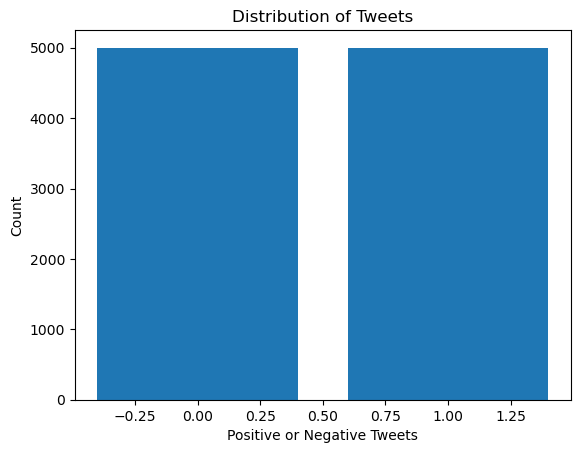

In [114]:
plt.bar(target_distribution.index,target_distribution.values)
plt.xlabel('Positive or Negative Tweets')
plt.ylabel('Count')
plt.title('Distribution of Tweets')
plt.show

In [115]:
print('\033[92m' + positive_tweets[random.randint(0,5000)])

@Chelt52 Kind words - thank you very much! It's @SueRyderLCH that does so much good in the #Cheltenham area :)


In [116]:
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@Albondiga94 if you have schemes I don't have schemes planned yet :(


There are few tasks that generally being done in NLP preprocessing.

1. Tokenization
2. Lowercasing
3. Removing stop words & punctuation
4. Stemming

In [117]:
example_tweet = positive_tweets[3400]
print(example_tweet)

@GalagansIsland @Gamerboss Pretty amazing!  What the hell was I doing @ 13, oh yeah playing video games. :)


In [118]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavisingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
import re
import string

from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

In [120]:
print(example_tweet)

#removing "RT" retweet text
example_tweet_1 = re.sub(r'RT[\s]+','',example_tweet)

#removing hyperlinks
example_tweet_1 = re.sub(r'https?://[^\s\n\r]+','',example_tweet_1)

#removing hastags

example_tweet_1 = re.sub(r'#','',example_tweet_1)

print(example_tweet_1)

@GalagansIsland @Gamerboss Pretty amazing!  What the hell was I doing @ 13, oh yeah playing video games. :)
@GalagansIsland @Gamerboss Pretty amazing!  What the hell was I doing @ 13, oh yeah playing video games. :)


### Tokenization

1. preserve_case = False -> tokenizer should convert all words to lowercase
2. strip_handles = True -> tokenizer will eliminate all twitter handles
3. reduce_len = True -> tokenizer will remove all the repeated characters in the word. ex: priiiceee - price

In [121]:
#instantiate tokenizer class

tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)

In [122]:
tweet_tokens = tokenizer.tokenize(example_tweet_1)
print(f'Tokenized strings: {tweet_tokens}')

Tokenized strings: ['pretty', 'amazing', '!', 'what', 'the', 'hell', 'was', 'i', 'doing', '@', '13', ',', 'oh', 'yeah', 'playing', 'video', 'games', '.', ':)']


### Removing stop words & punctuations

In [123]:
#importing english stop words
stopwords_english = stopwords.words('english')
clean_tweets = []

In [124]:
for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        clean_tweets.append(word)

In [125]:
print(clean_tweets)

['pretty', 'amazing', 'hell', '13', 'oh', 'yeah', 'playing', 'video', 'games', ':)']


### Stemming

In [126]:
import os
os.getcwd()

'/Users/pallavisingh/Documents/Data Science/NLP/Untitled Folder'

In [127]:
#Instantiate stemming class
stemmer = PorterStemmer() 

In [128]:
stem_tweet = []

for word in clean_tweets:
    stem_word = stemmer.stem(word)
    stem_tweet.append(stem_word)
    
print(stem_tweet)

['pretti', 'amaz', 'hell', '13', 'oh', 'yeah', 'play', 'video', 'game', ':)']


In [129]:
from reference import preprocess_tweets # Import the process_tweet function

# choose the same tweet
tweet = positive_tweets[3400]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = preprocess_tweets(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



@GalagansIsland @Gamerboss Pretty amazing!  What the hell was I doing @ 13, oh yeah playing video games. :)

preprocessed tweet:
['pretti', 'amaz', 'hell', '13', 'oh', 'yeah', 'play', 'video', 'game', ':)']


In [130]:
df.head()

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


### Visualizing word frequencies

In [131]:
from reference import build_frequency

freqs = build_frequency(df['tweet'],df['label'])

In [132]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [133]:
tweets_list = [] 
for i in df['tweet']:
    tweets_list.append(preprocess_tweets(i))
    

In [134]:
tweets_list

[['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)'],
 ['hey',
  'jame',
  'odd',
  ':/',
  'pleas',
  'call',
  'contact',
  'centr',
  '02392441234',
  'abl',
  'assist',
  ':)',
  'mani',
  'thank'],
 ['listen', 'last', 'night', ':)', 'bleed', 'amaz', 'track', 'scotland'],
 ['congrat', ':)'],
 ['yeaaah',
  'yipppi',
  'accnt',
  'verifi',
  'rqst',
  'succeed',
  'got',
  'blue',
  'tick',
  'mark',
  'fb',
  'profil',
  ':)',
  '15',
  'day'],
 ['one', 'irresist', ':)', 'flipkartfashionfriday'],
 ['like',
  'keep',
  'love',
  'custom',
  'wait',
  'long',
  'hope',
  'enjoy',
  'happi',
  'friday',
  'lwwf',
  ':)'],
 ['second',
  'thought',
  '’',
  'enough',
  'time',
  'dd',
  ':)',
  'new',
  'short',
  'enter',
  'system',
  'sheep',
  'must',
  'buy'],
 ['jgh', 'go', 'bayan', ':d', 'bye'],
 ['act',
  'mischiev',
  'call',
  'etl',
  'layer',
  'in-hous',
  'wareh',
  'app',
  'katamari',
  'well',
  '…',
  'name',
  'impli',
  ':p'],
 ['followfriday', 'top', '

In [135]:
data =[]
for word in keys:
    
    positive = 0
    negative = 0
    if (word,1) in freqs:
        positive = freqs[(word,1)]
        
    if (word,0) in freqs:
        negative = freqs[(word,0)]
        
    data.append([word,positive, negative])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

## Logistic Regression

### Training and Testing

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, x_test, Y_train, y_test = train_test_split(df['tweet'],df['label'], test_size = 0.2)

In [148]:
X_train

496     #FF #HappyFriday @szekifer @phattony138 @djchi...
5276                     @ABeezyGMT says the Man U fan :(
4634    Mans singing under the rain :) https://t.co/uj...
9635                @JayMcGuiness  :-( please notice me h
6871                       i miss everything about you":(
                              ...                        
7722               @luvsgngrhd ME TOO :((( wHERE IS MARGO
7246    i know right :( huhu sad lyf 😔😔😔 https://t.co/...
4149    Check out our new @NeonArenas Van outside the ...
1123    Thanks for the follows @rosbailey2_ros @Circui...
4443                @MatjazSircelj stuff just happens. :)
Name: tweet, Length: 8000, dtype: object

In [138]:
import numpy as np
def extract_features(tweet, freqs,preprocess_tweet = preprocess_tweets ):
    processed_tweet = preprocess_tweet(tweet)
    
    X = np.zeros((1,3))
    X[0,0] = 1
    
    for word in processed_tweet:
        
        X[0,1] += freqs.get((word,1),0)
        X[0,2] += freqs.get((word,0),0)
        
    # Check the shape of the array
    assert(X.shape == (1, 3)), f"Shape of x is {x.shape}, expected (1, 3)"
    return X  

In [139]:
test = extract_features(X_train[0],freqs)

In [140]:
X_train.iloc[2]

'Mans singing under the rain :) https://t.co/uj3mnLaJmo'

In [141]:
final_features = np.zeros((len(X_train),3))

for i in range(len(X_train)):
    final_features[i,:] = extract_features(X_train.iloc[i],freqs) 

In [149]:
final_features

array([[1.000e+00, 8.340e+02, 3.200e+01],
       [1.000e+00, 3.600e+02, 4.889e+03],
       [1.000e+00, 3.740e+03, 8.200e+01],
       ...,
       [1.000e+00, 3.937e+03, 1.220e+02],
       [1.000e+00, 4.781e+03, 3.720e+02],
       [1.000e+00, 3.720e+03, 6.400e+01]])

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [143]:
model = LogisticRegression()
model.fit(final_features,Y_train)

LogisticRegression()

In [144]:
test_features = np.zeros((len(x_test),3))

for i in range(len(x_test)):
    test_features[i,:] = extract_features(x_test.iloc[i],freqs)

In [145]:
y_pred = model.predict(test_features)

accuracy = accuracy_score(y_test, y_pred)

In [146]:
accuracy

0.9905

# Naive Bayes

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

In [151]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect

<8000x17549 sparse matrix of type '<class 'numpy.int64'>'
	with 78760 stored elements in Compressed Sparse Row format>

In [153]:
X_test_vect = vectorizer.transform(x_test)

In [154]:
from sklearn.naive_bayes import MultinomialNB

In [156]:
# Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vect, Y_train)

MultinomialNB()

In [157]:
# Make predictions
y_pred = model.predict(X_test_vect)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 76.50%
